# 딥러닝 실습 

In [1]:
# 데이터 셋 시각화 pandas 이용
import pandas as pd

df = pd.read_csv('pima-indians-diabetes.csv', 
                 header=None, 
                 names=['임신 횟수', '혈장 포도당 농도', '이완기 혈압', '삼두근 피부 두께', '인슐린', '체질량 지수', '직계 가족력', '나이', '당뇨병 발병 여부'], 
                 skiprows=9)
# show data
df

,임신 횟수,혈장 포도당 농도,이완기 혈압,삼두근 피부 두께,인슐린,체질량 지수,직계 가족력,나이,당뇨병 발병 여부
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 데이터 가공 (Data Engineering)

In [2]:
# 데이터셋 numpy로 담기
import numpy as np

dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')

In [3]:
print(dataset)
print(dataset.shape)

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
(768, 9)


In [4]:
## 데이터 셋 -> 정답과 문제 / 락습셋과 시험셋 로 나누기
x_train = dataset[:700, :8]
y_train = dataset[:700, 8]
x_test = dataset[700:, :8]
y_test = dataset[700:, 8]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(700, 8)
(700,)
(68, 8)
(68,)


## 모델 생성

In [5]:
# 모델 작성하기
from keras.models import Sequential #층층이 쌓이는 모델을 만들때 쓰이는 바구니
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu')) # 인풋은 위 출력 
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 컴파일 및 학습하기

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [10]:
history = model.fit(x_train, y_train, batch_size=64, epochs=1000)

Epoch 1/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.7886
Epoch 2/1000
11/11 [==============================] - 0s 1000us/step - loss: 0.4103 - accuracy: 0.8043
Epoch 3/1000
11/11 [==============================] - 0s 727us/step - loss: 0.4093 - accuracy: 0.8057
Epoch 4/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4071 - accuracy: 0.8086
Epoch 5/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4076 - accuracy: 0.8057
Epoch 6/1000
11/11 [==============================] - 0s 909us/step - loss: 0.4048 - accuracy: 0.7971
Epoch 7/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4040 - accuracy: 0.8071
Epoch 8/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4071 - accuracy: 0.8043
Epoch 9/1000
11/11 [==============================] - 0s 909us/step - loss: 0.4148 - accuracy: 0.8000
Epoch 10/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4104 -

11/11 [==============================] - 0s 727us/step - loss: 0.4122 - accuracy: 0.7986
Epoch 81/1000
11/11 [==============================] - 0s 636us/step - loss: 0.4069 - accuracy: 0.8100
Epoch 82/1000
11/11 [==============================] - 0s 727us/step - loss: 0.4060 - accuracy: 0.8043
Epoch 83/1000
11/11 [==============================] - 0s 727us/step - loss: 0.4047 - accuracy: 0.8043
Epoch 84/1000
11/11 [==============================] - 0s 636us/step - loss: 0.4015 - accuracy: 0.8100
Epoch 85/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4030 - accuracy: 0.8100
Epoch 86/1000
11/11 [==============================] - 0s 727us/step - loss: 0.4087 - accuracy: 0.8029
Epoch 87/1000
11/11 [==============================] - 0s 636us/step - loss: 0.4046 - accuracy: 0.8057
Epoch 88/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4045 - accuracy: 0.8057
Epoch 89/1000
11/11 [==============================] - 0s 909us/step - loss: 0.4054 - a

11/11 [==============================] - 0s 819us/step - loss: 0.4034 - accuracy: 0.8014
Epoch 160/1000
11/11 [==============================] - 0s 728us/step - loss: 0.4092 - accuracy: 0.8057
Epoch 161/1000
11/11 [==============================] - 0s 817us/step - loss: 0.4132 - accuracy: 0.7971
Epoch 162/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4139 - accuracy: 0.8043
Epoch 163/1000
11/11 [==============================] - 0s 728us/step - loss: 0.4012 - accuracy: 0.8100
Epoch 164/1000
11/11 [==============================] - 0s 998us/step - loss: 0.4134 - accuracy: 0.7957
Epoch 165/1000
11/11 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8071
Epoch 166/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4109 - accuracy: 0.8143
Epoch 167/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4130 - accuracy: 0.8029
Epoch 168/1000
11/11 [==============================] - 0s 817us/step - loss: 0.4

Epoch 238/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3974 - accuracy: 0.8086
Epoch 239/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3979 - accuracy: 0.8057
Epoch 240/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4056 - accuracy: 0.8071
Epoch 241/1000
11/11 [==============================] - 0s 637us/step - loss: 0.4005 - accuracy: 0.8057
Epoch 242/1000
11/11 [==============================] - 0s 636us/step - loss: 0.4067 - accuracy: 0.7971
Epoch 243/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4034 - accuracy: 0.7957
Epoch 244/1000
11/11 [==============================] - 0s 636us/step - loss: 0.3994 - accuracy: 0.8057
Epoch 245/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3986 - accuracy: 0.8129
Epoch 246/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3978 - accuracy: 0.8086
Epoch 247/1000
11/11 [==============================] - 0s 727us

11/11 [==============================] - 0s 727us/step - loss: 0.4005 - accuracy: 0.8000
Epoch 317/1000
11/11 [==============================] - 0s 636us/step - loss: 0.3991 - accuracy: 0.8086
Epoch 318/1000
11/11 [==============================] - 0s 727us/step - loss: 0.4009 - accuracy: 0.7971
Epoch 319/1000
11/11 [==============================] - 0s 727us/step - loss: 0.4006 - accuracy: 0.8043
Epoch 320/1000
11/11 [==============================] - 0s 636us/step - loss: 0.3994 - accuracy: 0.8086
Epoch 321/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3958 - accuracy: 0.8129
Epoch 322/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3956 - accuracy: 0.8129
Epoch 323/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3968 - accuracy: 0.8100
Epoch 324/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3972 - accuracy: 0.8114
Epoch 325/1000
11/11 [==============================] - 0s 727us/step - loss: 0

Epoch 395/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3953 - accuracy: 0.8114
Epoch 396/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3999 - accuracy: 0.8043
Epoch 397/1000
11/11 [==============================] - 0s 726us/step - loss: 0.4000 - accuracy: 0.8071
Epoch 398/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3964 - accuracy: 0.8143
Epoch 399/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3937 - accuracy: 0.8086
Epoch 400/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3968 - accuracy: 0.8057
Epoch 401/1000
11/11 [==============================] - 0s 819us/step - loss: 0.3994 - accuracy: 0.8157
Epoch 402/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3974 - accuracy: 0.8014
Epoch 403/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3931 - accuracy: 0.8071
Epoch 404/1000
11/11 [==============================] - 0s 818us

11/11 [==============================] - 0s 727us/step - loss: 0.3965 - accuracy: 0.8157
Epoch 474/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3967 - accuracy: 0.8129
Epoch 475/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4048 - accuracy: 0.7914
Epoch 476/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4053 - accuracy: 0.8014
Epoch 477/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3972 - accuracy: 0.8100
Epoch 478/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3940 - accuracy: 0.8100
Epoch 479/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3950 - accuracy: 0.8043
Epoch 480/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3887 - accuracy: 0.8129
Epoch 481/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3920 - accuracy: 0.8114
Epoch 482/1000
11/11 [==============================] - 0s 727us/step - loss: 0

11/11 [==============================] - 0s 727us/step - loss: 0.3916 - accuracy: 0.8029
Epoch 552/1000
11/11 [==============================] - 0s 636us/step - loss: 0.3914 - accuracy: 0.8114
Epoch 553/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3925 - accuracy: 0.8100
Epoch 554/1000
11/11 [==============================] - 0s 820us/step - loss: 0.3921 - accuracy: 0.8071
Epoch 555/1000
11/11 [==============================] - ETA: 0s - loss: 0.4415 - accuracy: 0.79 - 0s 729us/step - loss: 0.3933 - accuracy: 0.8114
Epoch 556/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3959 - accuracy: 0.8000
Epoch 557/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3914 - accuracy: 0.8114
Epoch 558/1000
11/11 [==============================] - 0s 638us/step - loss: 0.3925 - accuracy: 0.8057
Epoch 559/1000
11/11 [==============================] - 0s 729us/step - loss: 0.3956 - accuracy: 0.8129
Epoch 560/1000
11/11 [===============

11/11 [==============================] - 0s 727us/step - loss: 0.3982 - accuracy: 0.8000
Epoch 630/1000
11/11 [==============================] - 0s 636us/step - loss: 0.4023 - accuracy: 0.8029
Epoch 631/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3955 - accuracy: 0.8114
Epoch 632/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3957 - accuracy: 0.8129
Epoch 633/1000
11/11 [==============================] - 0s 636us/step - loss: 0.3965 - accuracy: 0.8100
Epoch 634/1000
11/11 [==============================] - 0s 727us/step - loss: 0.4036 - accuracy: 0.8100
Epoch 635/1000
11/11 [==============================] - 0s 727us/step - loss: 0.4060 - accuracy: 0.8014
Epoch 636/1000
11/11 [==============================] - 0s 638us/step - loss: 0.3936 - accuracy: 0.8171
Epoch 637/1000
11/11 [==============================] - 0s 818us/step - loss: 0.4003 - accuracy: 0.8114
Epoch 638/1000
11/11 [==============================] - 0s 820us/step - loss: 0

Epoch 708/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3919 - accuracy: 0.8186
Epoch 709/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3917 - accuracy: 0.8157
Epoch 710/1000
11/11 [==============================] - 0s 820us/step - loss: 0.3929 - accuracy: 0.8086
Epoch 711/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3873 - accuracy: 0.8143
Epoch 712/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3894 - accuracy: 0.8057
Epoch 713/1000
11/11 [==============================] - 0s 820us/step - loss: 0.3876 - accuracy: 0.8114
Epoch 714/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3914 - accuracy: 0.8086
Epoch 715/1000
11/11 [==============================] - 0s 729us/step - loss: 0.3904 - accuracy: 0.8114
Epoch 716/1000
11/11 [==============================] - 0s 817us/step - loss: 0.3966 - accuracy: 0.8100
Epoch 717/1000
11/11 [==============================] - 0s 817us

11/11 [==============================] - 0s 727us/step - loss: 0.3870 - accuracy: 0.8071
Epoch 787/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3868 - accuracy: 0.8114
Epoch 788/1000
11/11 [==============================] - 0s 636us/step - loss: 0.3992 - accuracy: 0.8071
Epoch 789/1000
11/11 [==============================] - 0s 728us/step - loss: 0.3920 - accuracy: 0.8157
Epoch 790/1000
11/11 [==============================] - 0s 909us/step - loss: 0.3906 - accuracy: 0.8100
Epoch 791/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3872 - accuracy: 0.8186
Epoch 792/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3915 - accuracy: 0.8114
Epoch 793/1000
11/11 [==============================] - 0s 819us/step - loss: 0.3902 - accuracy: 0.8071
Epoch 794/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3915 - accuracy: 0.8143
Epoch 795/1000
11/11 [==============================] - 0s 818us/step - loss: 0

Epoch 865/1000
11/11 [==============================] - 0s 727us/step - loss: 0.4017 - accuracy: 0.8000
Epoch 866/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3871 - accuracy: 0.8143
Epoch 867/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3933 - accuracy: 0.8043
Epoch 868/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3881 - accuracy: 0.8143
Epoch 869/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3940 - accuracy: 0.8014
Epoch 870/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3953 - accuracy: 0.8043
Epoch 871/1000
11/11 [==============================] - 0s 636us/step - loss: 0.3872 - accuracy: 0.8129
Epoch 872/1000
11/11 [==============================] - 0s 910us/step - loss: 0.3854 - accuracy: 0.8100
Epoch 873/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3898 - accuracy: 0.8171
Epoch 874/1000
11/11 [==============================] - 0s 636us

11/11 [==============================] - 0s 727us/step - loss: 0.3892 - accuracy: 0.8086
Epoch 944/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3841 - accuracy: 0.8229
Epoch 945/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3898 - accuracy: 0.8129
Epoch 946/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3911 - accuracy: 0.8157
Epoch 947/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3933 - accuracy: 0.8029
Epoch 948/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3856 - accuracy: 0.8086
Epoch 949/1000
11/11 [==============================] - 0s 818us/step - loss: 0.3832 - accuracy: 0.8086
Epoch 950/1000
11/11 [==============================] - 0s 727us/step - loss: 0.3914 - accuracy: 0.8086
Epoch 951/1000
11/11 [==============================] - 0s 728us/step - loss: 0.3951 - accuracy: 0.8143
Epoch 952/1000
11/11 [==============================] - 0s 818us/step - loss: 0

In [11]:
history.history # loss 와 accuracy 를 담고 있다.

{'loss': [0.40791791677474976,
  0.41033655405044556,
  0.4093465805053711,
  0.40711212158203125,
  0.40764936804771423,
  0.40484127402305603,
  0.4039577841758728,
  0.4071333408355713,
  0.4147872030735016,
  0.41041669249534607,
  0.4171408414840698,
  0.4160560071468353,
  0.415945827960968,
  0.41055354475975037,
  0.41060346364974976,
  0.4210800528526306,
  0.4230879545211792,
  0.4134679436683655,
  0.4043077826499939,
  0.4098547399044037,
  0.4034586548805237,
  0.4073144197463989,
  0.4083271026611328,
  0.4099399745464325,
  0.41124388575553894,
  0.4097035825252533,
  0.40733659267425537,
  0.40800702571868896,
  0.40734922885894775,
  0.4063771367073059,
  0.40813571214675903,
  0.40570956468582153,
  0.4043723940849304,
  0.41077959537506104,
  0.41832005977630615,
  0.4184357225894928,
  0.4085737466812134,
  0.4079815745353699,
  0.4142357409000397,
  0.40794673562049866,
  0.40999096632003784,
  0.4037885367870331,
  0.4084363281726837,
  0.4094489514827728,
  0.408

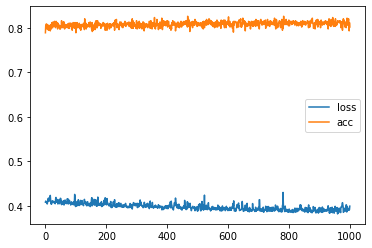

In [12]:
# 그래프로 경과 확인하기
import matplotlib.pyplot as plt

losses = history.history['loss']
accs = history.history['accuracy']

plt.plot(losses, label='loss')
plt.plot(accs, label='acc')
plt.legend() # 범례
plt.show()

## 평가하기

In [14]:
scores = model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 671us/step - loss: 0.8261 - accuracy: 0.7353


In [20]:
scores # loss 와 metrics 를 담고있다.
loss, accuracy = scores
print(f'accuracy: {accuracy*100:.2f}%')

accuracy: 73.53%


## 질문

**은닉층에서 출력값은 무얼 나타내는 걸까? 입력값을 어떤 형태로 출력하는 걸까?**  